In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import pandas as pd
import string
import os

In [2]:
anime_recommand_raw = pd.read_csv("./data/anime_recommend.csv", index_col="anime_id")
rating_recommand_raw = pd.read_csv("./data/rating_recommend.csv")
data_anime_raw = pd.read_csv("./data/data_anime_filtered.csv", index_col="slug")

In [3]:
anime_recommand_raw['slug'] = [ name.lower().replace(" ", "-") for name in anime_recommand_raw['name'] ]

In [4]:
anime_recommand_raw

,name,genre,type,episodes,rating,members,slug
anime_id,,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,kimi-no-na-wa.
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,fullmetal-alchemist:-brotherhood
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,gintama°
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,steins;gate
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,gintama&#039;
32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,haikyuu!!:-karasuno-koukou-vs-shiratorizawa-ga...
11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,hunter-x-hunter-(2011)
820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679,ginga-eiyuu-densetsu
15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,gintama-movie:-kanketsu-hen---yorozuya-yo-eien...


In [5]:
rating_recommand_raw.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
data_anime_raw.head()

,Unnamed: 0,Title,Type,Episodes,Start airing,End airing,Starting season,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites
slug,,,,,,,,,,,,,,,,
fullmetal-alchemist:-brotherhood,0,Fullmetal Alchemist: Brotherhood,TV,64,2009-4-5,2010-7-4,Spring,Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,719706,1176368,105387
kimi-no-na-wa.,1,Kimi no Na wa.,Movie,1,2016-8-26,2016-9-2,Fall,CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,454969,705186,33936
gintama°,2,Gintama°,TV,51,2015-4-8,2016-3-30,Spring,Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,70279,194359,5597
steins;gate-0,3,Steins;Gate 0,TV,23,2018-4-12,2018-9-20,Spring,White Fox,Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,12609,186331,1117
steins;gate,4,Steins;Gate,TV,24,2011-4-6,2011-9-14,Spring,White Fox,Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,552791,990419,90365


## Filter the anime

In [7]:

# Select only the anime in the dataset data_anime
anime_id_selected = []

for slug in data_anime_raw.index:
    current_id = anime_recommand_raw[anime_recommand_raw['slug'] == slug].index
    if len( current_id ) > 0:
        anime_id_selected.append( current_id[0] )

In [8]:
anime_id_selected.sort()
anime_id_selected = np.array(anime_id_selected)

In [9]:
anime_id_selected.shape

(1296,)

In [10]:
anime_id_selected

array([    1,     5,     6, ..., 34349, 34445, 34514], dtype=int64)

## Get the rating of the selected animes from the first 5000 users

In [11]:
file_exists = os.path.exists("./data/rating_table.csv")
if not file_exists:
    rating_table = np.full( (5000, len(anime_id_selected)), -1 )
    for index, row in rating_recommand_raw.iterrows():
        if row['user_id'] >= 5000:
            break
        if row['anime_id'] in anime_id_selected:
            rating_table[ row['user_id'] - 1 , np.where( anime_id_selected == row['anime_id'] )[0] ] = row['rating']
    pd.DataFrame(rating_table, columns = list(anime_id_selected) ).to_csv("./data/rating_table.csv")

In [12]:
rating_table_df = pd.read_csv("./data/rating_table.csv", index_col = 0)

In [14]:
rating_table_df

,1,5,6,15,16,17,18,20,24,28,...,33988,34076,34103,34136,34240,34284,34299,34349,34445,34514
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1,-1,-1,8,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,-1,8,6,-1,6,6,6,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


## Dimension Reduction

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=120)

In [17]:
rating_table = np.array( rating_table_df )

In [18]:
pca.fit(rating_table)

PCA(copy=True, iterated_power='auto', n_components=120, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
pca.explained_variance_[:] 

array([472.57926791, 102.3343097 ,  83.45457951,  74.82111033,
        70.20731454,  51.56638662,  39.73408294,  37.88845954,
        35.17801951,  30.79977263,  29.96193493,  26.16825841,
        24.34749384,  23.89633435,  21.85231276,  21.28260237,
        20.20992892,  19.66527657,  18.85102323,  18.1512688 ,
        17.64740148,  17.47558283,  17.06037906,  16.33014319,
        16.2802512 ,  15.6095039 ,  15.29735048,  15.10699191,
        14.97821459,  14.72449712,  14.47305828,  14.10783705,
        14.02218598,  13.792135  ,  13.60285256,  13.44327762,
        13.27716201,  12.95337306,  12.86840146,  12.74513035,
        12.19549701,  12.12865153,  12.04566484,  11.90687789,
        11.72534682,  11.54869509,  11.5180123 ,  11.43118189,
        11.06744538,  11.01512306,  10.98870021,  10.81190546,
        10.78210244,  10.54156594,  10.52564514,  10.36934539,
        10.21366229,  10.0960068 ,   9.97812098,   9.92847767,
         9.80191197,   9.76187466,   9.63586334,   9.57

In [21]:
from sklearn.decomposition import PCA as pca

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Or reduce the data towards 2 PCs
# model = pca(n_components=2)

# Fit transform
results = model.fit_transform(rating_table)

# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=4)

AttributeError: 'PCA' object has no attribute 'plot'

## Get the average Score of  each genre from each user

In [14]:
genres = set({})

for index, anime in data_anime_raw.iterrows():
    for genre in anime['Genres'].split(','):
        if genre not in genres:
            genres.add(genre)

genres = list(genres)

In [15]:
genres

['Horror',
 'Sports',
 'Martial Arts',
 'Comedy',
 'Kids',
 'Mystery',
 'Josei',
 'Demons',
 'Historical',
 'Mecha',
 'Thriller',
 'School',
 'Drama',
 'Shounen',
 'Game',
 'Cars',
 'Romance',
 'Slice of Life',
 'Sci-Fi',
 'Supernatural',
 'Police',
 'Vampire',
 'Samurai',
 'Parody',
 '\xa0Adventure',
 'Music',
 'Harem',
 'Dementia',
 'Action',
 'Military',
 'Adventure',
 'Shoujo Ai',
 'Magic',
 'Seinen',
 'Super Power',
 'Fantasy',
 'Shoujo',
 'Psychological',
 'Space',
 'Shounen Ai']

In [16]:
average_rating_by_genre = np.full( (5000, len(genres)), 0 )
count_by_genre = np.ones( (5000, len(genres)) )

In [17]:
average_rating_by_genre

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
count_by_genre

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [19]:
for index, row in rating_recommand_raw.iterrows():
    if row['user_id'] >= 5000:
        break
    if row['anime_id'] in anime_id_selected and row['rating']> 0:
        slug = anime_recommand_raw.loc[ row['anime_id'] ]['slug']
        
        current_genres = data_anime_raw.loc[slug]['Genres']
        if isinstance (current_genres, str):
            current_genres = current_genres.split(",")
        else:
            print(current_genres)
            current_genres = current_genres[0].split(",")
        for g in current_genres:
            count_by_genre[ row['user_id'] , genres.index(g) ] += 1
            average_rating_by_genre[ row['user_id'] , genres.index(g) ] += row['rating']

In [20]:
average_rating_by_genre = average_rating_by_genre / count_by_genre

In [21]:
average_rating_by_genre

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 5.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [4.33333333, 0.        , 5.        , ..., 6.91666667, 7.08333333,
        0.        ],
       [5.        , 6.66666667, 0.        , ..., 8.25      , 5.        ,
        0.        ],
       [0.        , 0.        , 4.        , ..., 7.25      , 0.        ,
        0.        ]])

In [22]:
pd.DataFrame(average_rating_by_genre, columns = genres ).to_csv("./data/average_score_by_genre_from_users.csv")

In [23]:
pd.DataFrame(average_rating_by_genre, columns = genres )

,Horror,Sports,Martial Arts,Comedy,Kids,Mystery,Josei,Demons,Historical,Mecha,...,Adventure,Shoujo Ai,Magic,Seinen,Super Power,Fantasy,Shoujo,Psychological,Space,Shounen Ai
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,4.666667,8.125000,6.000000,8.095238,6.250000,7.222222,0.000000,5.250000,3.500000,3.500000,...,7.863636,0.000000,7.545455,6.000000,7.200000,8.000000,3.500000,6.875000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,3.000000,6.583333,4.750000,5.270073,5.666667,3.923077,4.666667,5.363636,5.666667,2.333333,...,6.156863,0.000000,4.833333,6.238095,4.857143,5.525000,2.666667,4.500000,5.333333,0.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,6.800000,5.666667,6.000000,7.671429,6.333333,7.857143,0.000000,7.181818,6.400000,7.777778,...,7.674419,0.000000,7.709677,7.266667,7.818182,7.648649,7.000000,8.000000,0.000000,0.0
8,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,0.000000,5.000000,0.000000,6.333333,7.000000,0.000000,0.000000,0.000000,0.0
9,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


## Get the Number of Fans of each Genre

In [55]:
fans_by_genre = np.zeros( (len(genres), len(genres)) )
haters_by_genre = np.zeros( (len(genres), len(genres)) )

In [56]:
average_rating_by_genre.shape

(5000, 40)

if the user's average rating over one genre is bigger than 8, we consider he is a fan of this genre

in `fans_by_genre`, `[i, i]` stores the number of fans of `i`th genre and `[i, j]` is the number of co-fan of genre `i` and `j`, the number of fans of the two in same time

In [57]:
for index, rating in enumerate(average_rating_by_genre):
    for i in range(len(rating)):
        if rating[i] >= 7:
            fans_by_genre[i, i] += 1
        for j in range(i+1, len(rating)):
            if rating[i] >= 7 and rating[j] >= 7:
                fans_by_genre[i, j] += 1
                fans_by_genre[j, i] += 1
        if 0.01 < rating[i] < 4:
            haters_by_genre[i, i] += 1
        for j in range(i+1, len(rating)):
            if 0.01 < rating[i] < 4 and 0.01 < rating[j] < 4:
                haters_by_genre[i, j] += 1
                haters_by_genre[j, i] += 1

In [58]:
fans_by_genre

array([[ 461.,  156.,   93., ...,  413.,   60.,   17.],
       [ 156.,  606.,  133., ...,  407.,   56.,   40.],
       [  93.,  133.,  380., ...,  213.,   46.,   11.],
       ...,
       [ 413.,  407.,  213., ..., 1466.,  161.,   39.],
       [  60.,   56.,   46., ...,  161.,  214.,    2.],
       [  17.,   40.,   11., ...,   39.,    2.,   85.]])

In [59]:
pd.DataFrame(fans_by_genre, columns = genres ).to_csv("./data/fans_by_genre.csv")

In [60]:
haters_by_genre

array([[235.,  13.,  26., ...,  21.,  15.,   4.],
       [ 13., 160.,  17., ...,   5.,  15.,   6.],
       [ 26.,  17., 294., ...,  16.,  16.,   4.],
       ...,
       [ 21.,   5.,  16., ..., 138.,   3.,   2.],
       [ 15.,  15.,  16., ...,   3., 147.,   1.],
       [  4.,   6.,   4., ...,   2.,   1.,  59.]])

In [61]:
pd.DataFrame(haters_by_genre, columns = genres ).to_csv("./data/haters_by_genre.csv")

## K means cluster 

In [122]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(average_rating_by_genre)

In [123]:
kmeans.inertia_ / 5000

122.90497610974045

In [126]:
inertias = np.zeros(30)
for k in range(1,31):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(average_rating_by_genre)
    inertias[k-1] = kmeans.inertia_ / 5000

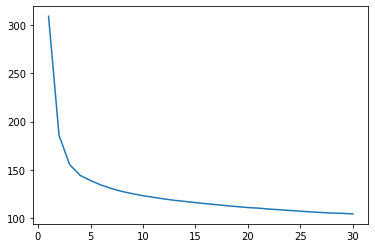

In [127]:
pl.plot(range(1,31), inertias)

In [53]:
from collections import Counter 
Counter( kmeans.predict(rating_table) )

Counter({29: 1915,
         7: 199,
         17: 91,
         19: 133,
         11: 261,
         10: 585,
         13: 395,
         16: 24,
         2: 205,
         5: 56,
         18: 209,
         22: 12,
         20: 55,
         1: 188,
         26: 209,
         25: 102,
         21: 25,
         9: 99,
         6: 2,
         0: 40,
         8: 40,
         14: 54,
         15: 3,
         24: 34,
         12: 52,
         3: 6,
         4: 1,
         23: 2,
         28: 1,
         27: 2})

In [39]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(rating_table)

In [40]:
Counter( kmeans.predict(rating_table) )

Counter({2: 2216, 3: 1605, 1: 854, 0: 325})

In [155]:
# def nmf(X, k):
#     """
#     Args:
#         X (np.array, dim: n,m,4): containing the image channel to be processed
#         k (int): the number of elements to be used in the low rank approximation 
    
#     Returns:
#         X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
#     """
    
# #     X_low_rank_approx = np.zeros(X.shape)
# #     for i in range(4):
#     A_0, D, B_0 = np.linalg.svd(X, full_matrices=False)
#     A = np.abs(A_0[:,:k])
#     B = np.abs(B_0[:k,:])

#     for _ in range(65):
#         B = np.nan_to_num(B * (A.T.dot(X))/(A.T.dot(A.dot(B))))
#         A = np.nan_to_num(A * (X.dot(B.T)) / (A.dot(B.dot(B.T))))
#     return A, B